## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [111]:
! git clone https://github.com/carascott/knn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

fatal: destination path 'knn' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [91]:
# Q1-1
df = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ]

In [92]:
print(df.head())
print(df.shape)
# There were no NA's to remove from this data set

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [93]:
# Q1-2
def maxmin(x):
    normx = (x-min(x))/(max(x)-min(x))
    return normx

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])
# Maximizes year and mileage variables using maxmin

In [94]:
# Q1-3
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,
                                                    random_state = 100)
print(x, y)

          year   mileage
0     0.744681  0.269287
1     0.808511  0.187194
2     0.957447  0.038892
3     0.872340  0.063016
4     0.957447  0.006537
...        ...       ...
2494  0.978723  0.023193
2495  0.957447  0.033944
2496  0.957447  0.031037
2497  0.957447  0.031983
2498  0.957447  0.030818

[2499 rows x 2 columns] 0        6300
1        2899
2        5350
3       25000
4       27700
        ...  
2494     7800
2495     9200
2496     9200
2497     9200
2498     9200
Name: price, Length: 2499, dtype: int64


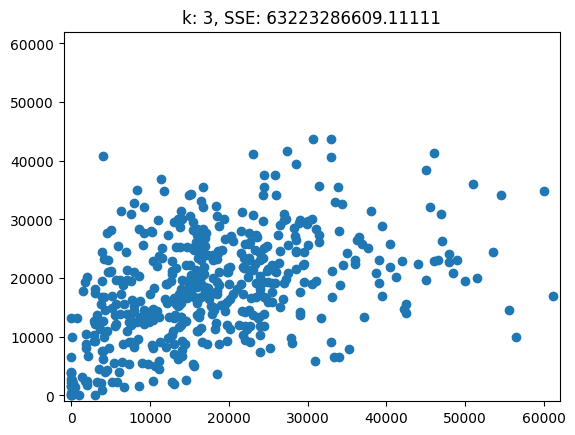

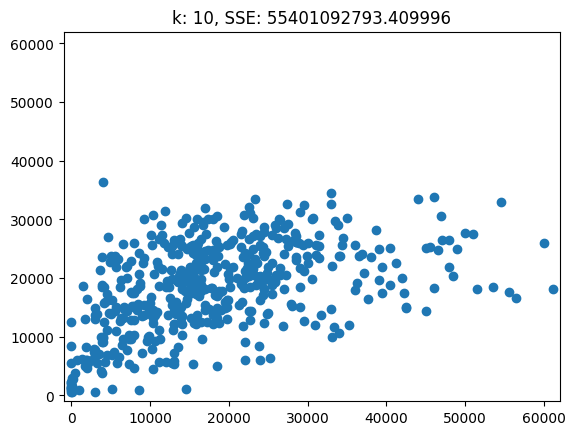

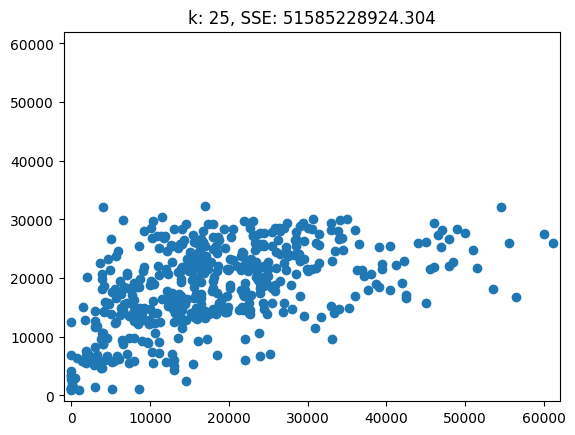

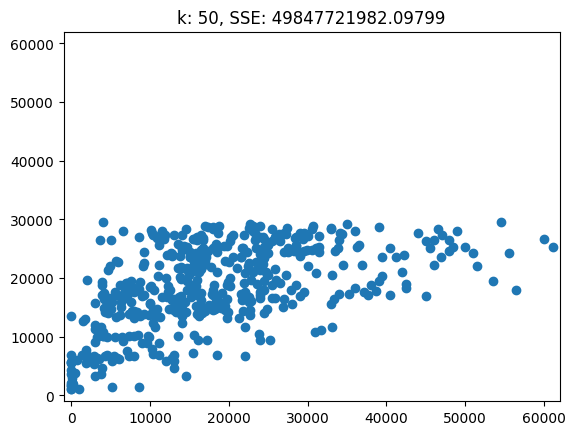

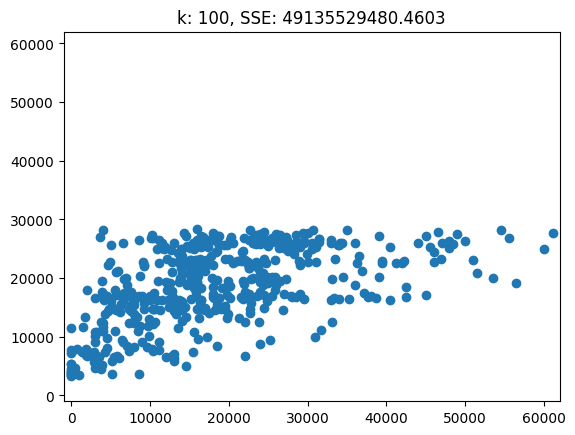

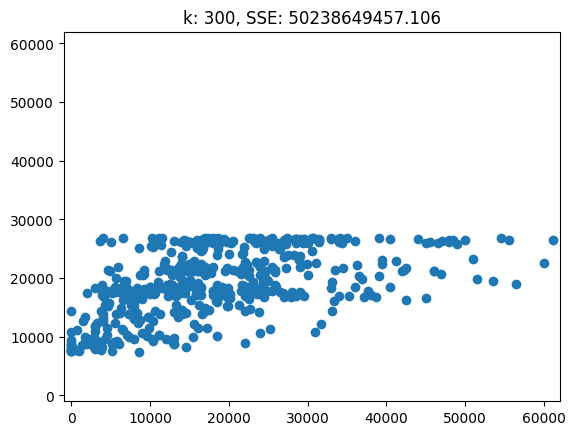

In [95]:
# Q1-4
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
    y_hat = model.predict(x_test)
    SSE = np.sum((y_test-y_hat)**2)
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()

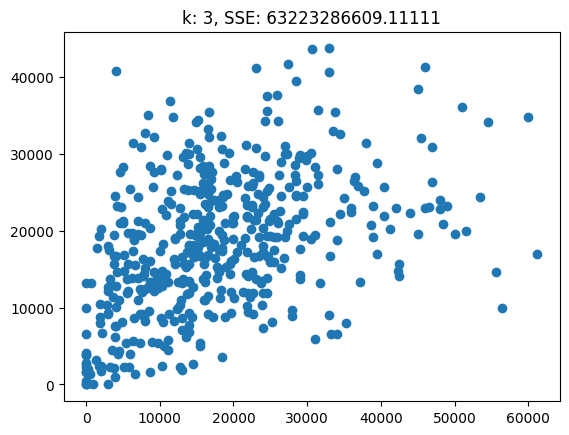

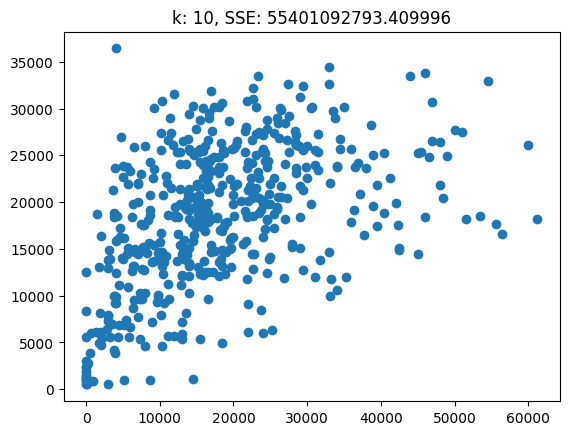

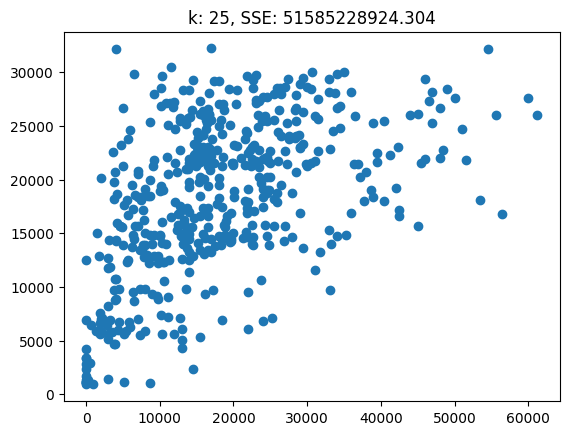

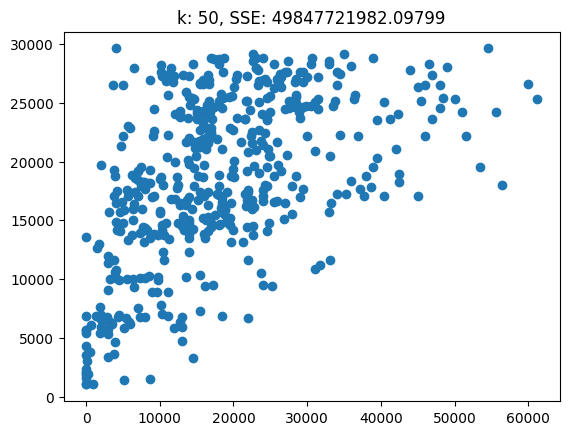

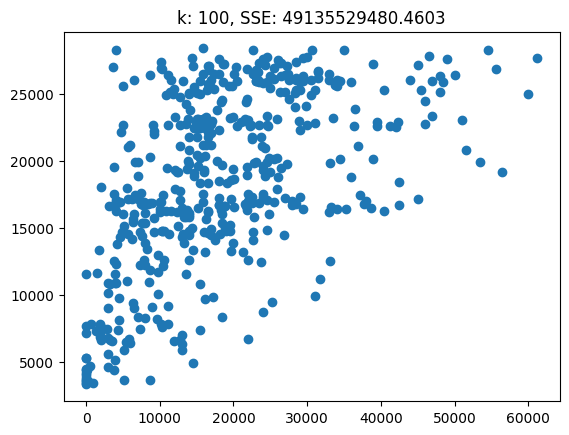

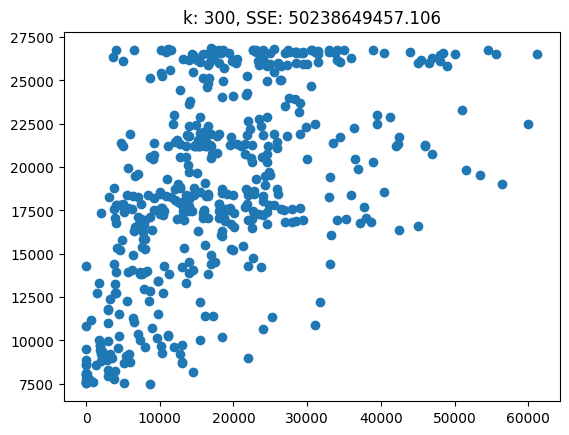

In [96]:
# Q1-4
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
    y_hat = model.predict(x_test)
    SSE = np.sum( (y_test-y_hat)**2 )

    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    plt.show()

[77]


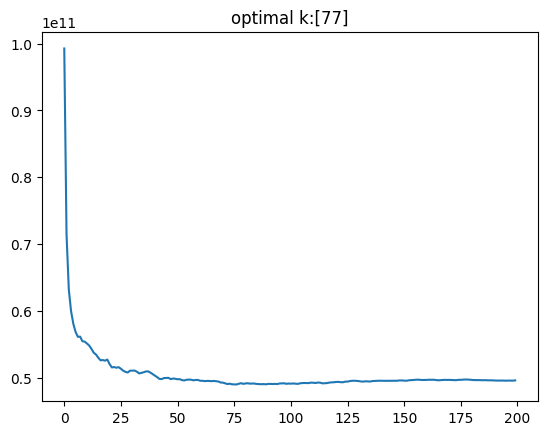

In [97]:
# Q1-5
kbar = 200
SSE = np.zeros(kbar)

for k in range(kbar):
    model = KNeighborsRegressor(n_neighbors=k+1).fit(x_train,y_train)
    y_hat = model.predict(x_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSEmin = np.min(SSE)
minindex = np.where(SSE==SSEmin)
kstar = (np.arange(1, kbar))[minindex]
print(kstar)

plt.plot(np.arange(0,kbar), SSE)
plt.title("optimal k:" + str(kstar))
plt.show()

Q1-6 : Describe what happened in the plots of predicted versus actual prices as
 varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)


The optimal is shown on top as 77 from Q1-5, which mostly closely aligns with the k_bar values of 50 and 100. A k value under 50 would be underfitting the data and a k value of 300 is highly likely overfitting the data.



**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [98]:
# Q2-1
hdf = pd.read_csv('/content/knn/data/heart_failure_clinical_records_dataset.csv')
print(hdf.shape)
hdf.describe()
# There are no NA's to remove from this data set
hdf = hdf.drop('time',axis=1)

(299, 13)


In [99]:
# Q2-2
hdf.corr()
# According to the bottom row, age, ejection_fraction, and serum_creatinine, have
# the highest correlations with the "death event".

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [100]:
# Q2-3
ks = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

for k in ks:
    print(hdf.loc[:,[k,'DEATH_EVENT']].groupby(k).describe())
# The biggest difference between the mean variables occurs in the high blood
# pressure category, with an increase of about .08. The variable in which
# a higher proportion of the population die if they have said variable is
# high blood pressure. Anaemia is the only other variable where this is the
# case, and only sees about a .02 difference in the mean.

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

In [101]:
# Q2-4
y = hdf['DEATH_EVENT']
ks = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
x = hdf.loc[:,ks]

In [102]:
# Q2-5
def maxmin(x):
    normx = (x-min(x))/(max(x)-min(x))
    return normx
x = x.apply(maxmin)

In [103]:
# Q2-6
np.random.seed(100)
N = x.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) )
test = [item for item in all if item not in train]

x_train = x.iloc[train,:]
y_train = y.iloc[train]
x_test = x.iloc[test,:]
y_test = y.iloc[test]

[6]


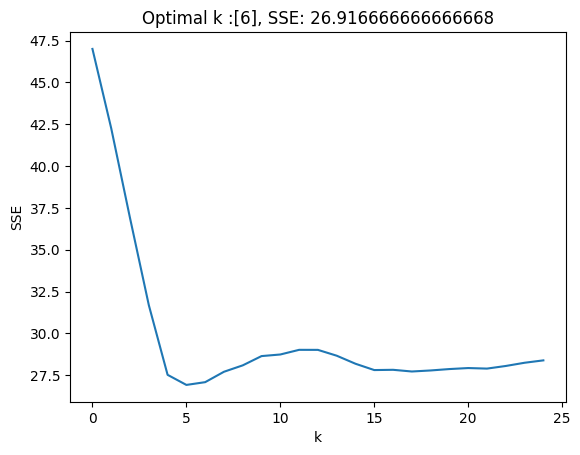

In [105]:
# Q2-7
kbar = 25
SSE = np.zeros(kbar)

for k in range(kbar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    predictor = model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    SSE[k] = np.sum((y_test-y_hat)**2)

SSEmin = np.min(SSE) #
mini = np.where(SSE==SSEmin)
kstar = (np.arange(1,kbar))[mini]
print(kstar)

plt.plot(np.arange(0,kbar),SSE)
plt.xlabel("k")
plt.title("Optimal k :" + str(kstar)+', SSE: ' + str(SSEmin))
plt.ylabel('SSE')
plt.show()

[83]


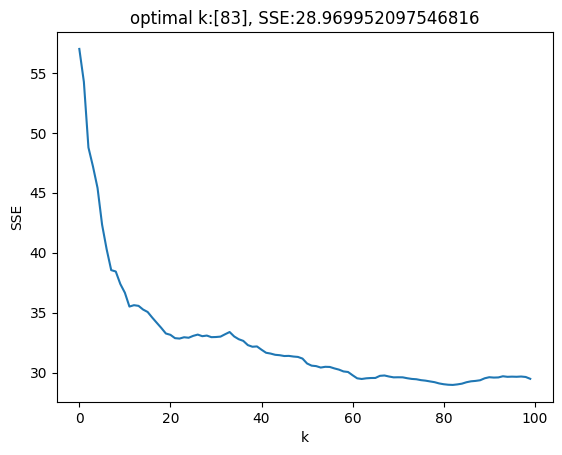

In [110]:
# Q2-8
d = hdf.drop('DEATH_EVENT', axis=1)
x_train = d.iloc[train,:]
y_train = y.iloc[train]
x_test = d.iloc[test,:]
y_test = y.iloc[test]

kbar = 100
kgrid = np.arange(1,kbar)
SSE = np.zeros(kbar)

for k in range(kbar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(x_train,y_train)
    y_hat = knn.predict(x_test)
    SSE[k] = np.sum((y_test-y_hat)**2)

SSEmin = np.min(SSE)
minindex = np.where(SSE==SSEmin)
kstar = (np.arange(1,kbar))[minindex]
print(kstar)

plt.plot(np.arange(0,kbar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(kstar)+', SSE:'+str(SSEmin))
plt.ylabel('SSE')
plt.show()
# Using same code, there is a difference in optimal k values (6 and 83). This is
# because with additional, and potentially too many, variables, the optimal k
# increases.